<a href="https://colab.research.google.com/github/How-MunCheng/PnemoniaDetection_CNN/blob/main/CNN_Pneumonia_Detection_From_Chest_X_Ray_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONVOLUTIONAL NEURAL NETWORK-BASED PNEUMONIA DETECTION FROM CHEST X-RAY IMAGES**

**OBJECTIVES**

•	To preprocess and enhance chest X-ray images for optimal input to machine learning models.

•	To design, train, and validate a Convolutional Neural Network (CNN) capable of distinguishing pneumonia cases from normal cases.

•	To evaluate the model’s diagnostic performance using metrics including accuracy, precision, recall, F1-score, and AUC, confusion metrices.



In [ ]:
# connect Google Drive for importing input data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import library, package

import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# training parameters

image_size = 224 # resize input images
batch = 32 # set number of samples processed per batch
seed = 42 # fix randomness

In [ ]:
# define dataset paths

train_path = "/content/drive/MyDrive/chest_xray/train/"
test_path = "/content/drive/MyDrive/chest_xray/test/"

In [ ]:
# use glob to collect file paths for input images

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

In [ ]:
# create labeled dataframes for train data

train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['Class'])
df_train['Image Path'] = [x for x in train_list]

df_train

,Class,Image Path
0,Normal,/content/drive/MyDrive/chest_xray/train//NORMAL/IM-0517-0001-0001.jpeg
1,Normal,/content/drive/MyDrive/chest_xray/train//NORMAL/IM-0527-0001.jpeg
2,Normal,/content/drive/MyDrive/chest_xray/train//NORMAL/IM-0516-0001.jpeg
3,Normal,/content/drive/MyDrive/chest_xray/train//NORMAL/IM-0526-0001.jpeg
4,Normal,/content/drive/MyDrive/chest_xray/train//NORMAL/IM-0523-0001-0001.jpeg
...,...,...
5211,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person1413_bacteria_3613.jpeg
5212,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person1413_bacteria_3615.jpeg
5213,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person1413_bacteria_3617.jpeg
5214,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person1413_bacteria_3620.jpeg


In [ ]:
# create labeled dataframes for test data

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['Class'])
df_test['Image Path'] = [x for x in test_list]

df_test


,Class,Image Path
0,Normal,/content/drive/MyDrive/chest_xray/test//NORMAL/IM-0028-0001.jpeg
1,Normal,/content/drive/MyDrive/chest_xray/test//NORMAL/IM-0023-0001.jpeg
2,Normal,/content/drive/MyDrive/chest_xray/test//NORMAL/IM-0006-0001.jpeg
3,Normal,/content/drive/MyDrive/chest_xray/test//NORMAL/IM-0005-0001.jpeg
4,Normal,/content/drive/MyDrive/chest_xray/test//NORMAL/IM-0013-0001.jpeg
...,...,...
619,Pneumonia,/content/drive/MyDrive/chest_xray/test//PNEUMONIA/person69_virus_129.jpeg
620,Pneumonia,/content/drive/MyDrive/chest_xray/test//PNEUMONIA/person83_bacteria_414.jpeg
621,Pneumonia,/content/drive/MyDrive/chest_xray/test//PNEUMONIA/person83_bacteria_407.jpeg
622,Pneumonia,/content/drive/MyDrive/chest_xray/test//PNEUMONIA/person63_virus_121.jpeg


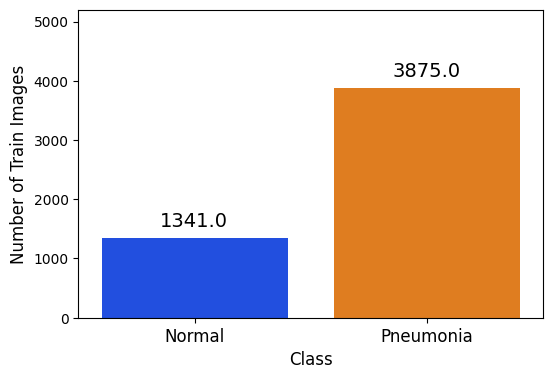

In [ ]:
# plot for class distribution in train dataset

plt.figure(figsize=(6,4))
ax = sns.countplot(x='Class', data=df_train, palette="bright")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("Number of Train Images", fontsize= 12)
plt.ylim(0,5200)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+200), fontsize = 14)

plt.show()


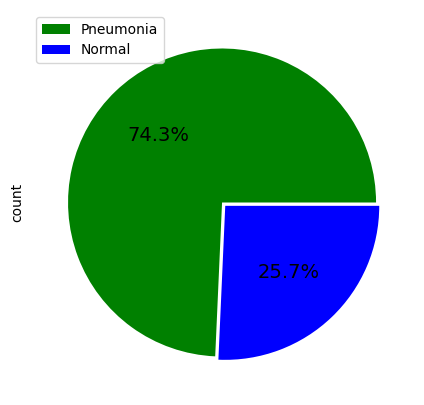

In [ ]:
# piechart for class distribution in train dataset

plt.figure(figsize=(7,5))

df_train['Class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['green','blue'], explode = [0,0.03], textprops = {"fontsize":14})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

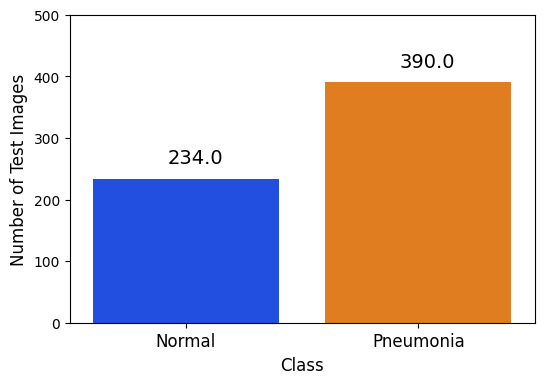

In [ ]:
# plot for class distribution in test dataset

plt.figure(figsize=(6,4))

ax = sns.countplot(x='Class', data=df_test, palette="bright")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("Number of Test Images", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+25), fontsize = 14)

plt.show()

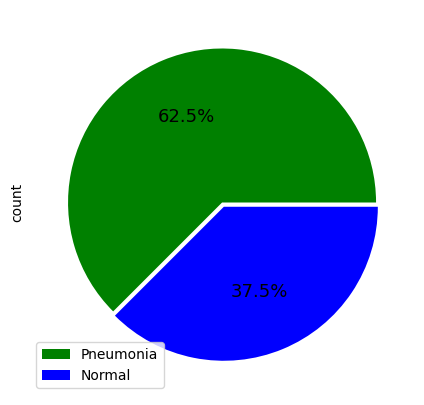

In [ ]:
#  piechart for class distribution in test dataset

plt.figure(figsize=(7,5))

df_test['Class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['green','blue'], explode = [0,0.03], textprops = {"fontsize":13})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

Train Dataset: Normal


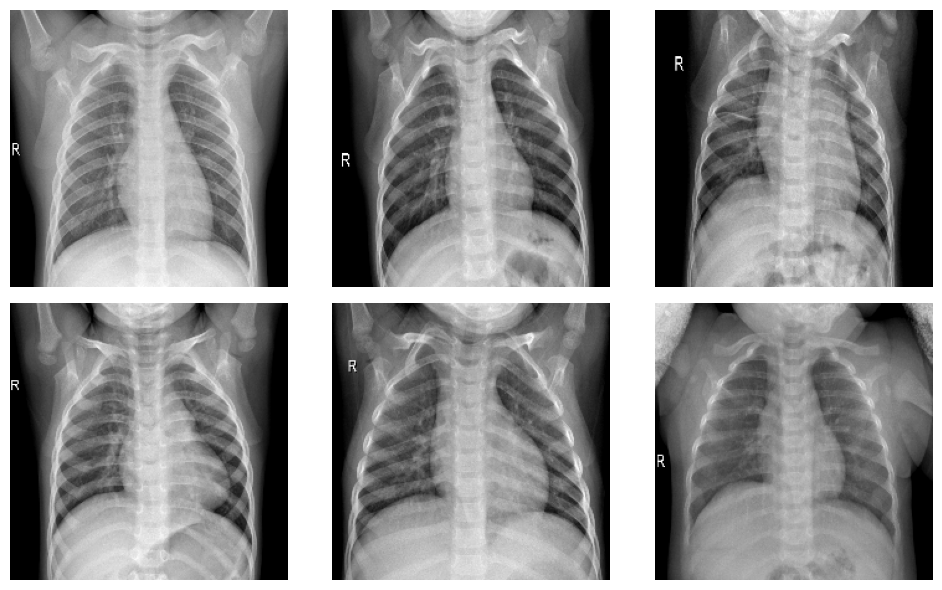

In [ ]:
# display 6 normal images from train dataset

print('Train Dataset: Normal')

plt.figure(figsize=(10,6))

for i in range(0, 6):
    plt.subplot(2,3,i + 1)
    image = cv2.imread(train_normal[i])
    image = cv2.resize(image, (image_size,image_size))
    plt.imshow(image)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Dataset: Pneumonia


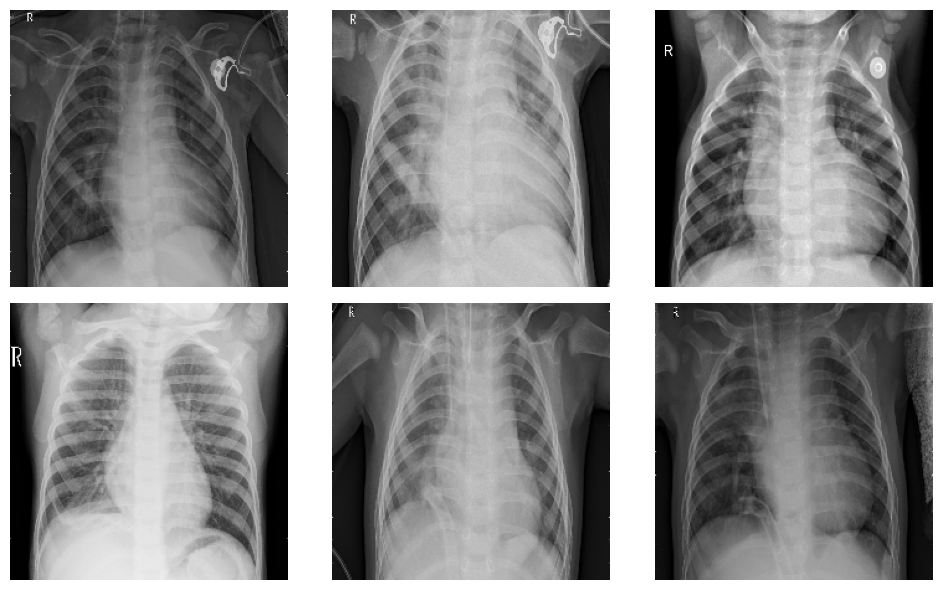

In [ ]:
# display 6 Pneumonia images from train dataset

print('Train Dataset: Pneumonia')

plt.figure(figsize=(10,6))

for i in range(0, 6):
    plt.subplot(2,3,i + 1)
    image = cv2.imread(train_pneumonia[i])
    image = cv2.resize(image, (image_size,image_size))
    plt.imshow(image)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Dataset: Normal


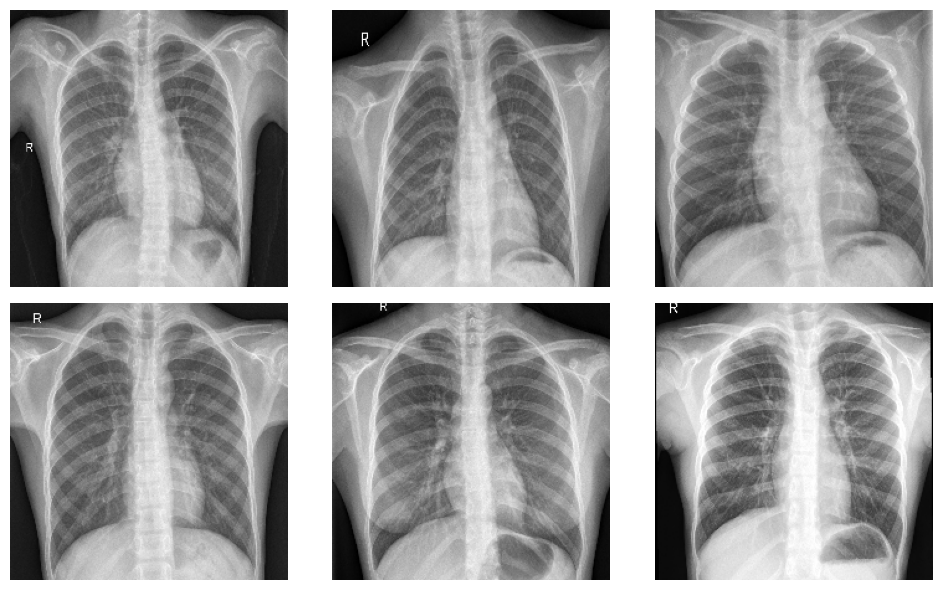

In [ ]:
# display 6 normal images from test dataset

print('Test Dataset: Normal')

plt.figure(figsize=(10,6))

for i in range(0, 6):
    plt.subplot(2,3,i + 1)
    image = cv2.imread(test_normal[i])
    image = cv2.resize(image, (image_size,image_size))
    plt.imshow(image)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Dataset: Pneumonia


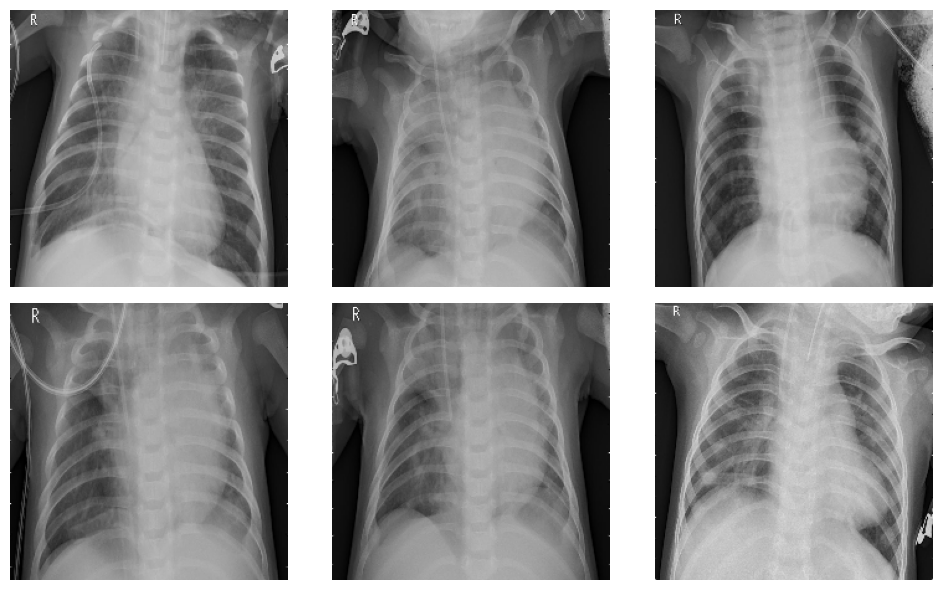

In [ ]:
# display 6 Pneumonia images from test dataset

print('Test Dataset: Pneumonia')

plt.figure(figsize=(10,6))

for i in range(0, 6):
    plt.subplot(2,3,i + 1)
    image = cv2.imread(test_pneumonia[i])
    image = cv2.resize(image, (image_size,image_size))
    plt.imshow(image)
    plt.axis("off")

plt.tight_layout()

plt.show()

In [ ]:
# stratified split 80% train, 20% validation on the train dataset

train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = seed, stratify = df_train['Class'])


In [ ]:
# display train dataframe after split

train_df

,Class,Image Path
99,Normal,/content/drive/MyDrive/chest_xray/train//NORMAL/IM-0607-0001.jpeg
1284,Normal,/content/drive/MyDrive/chest_xray/train//NORMAL/IM-0491-0001-0001.jpeg
5142,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person1383_virus_2377.jpeg
1365,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person545_bacteria_2288.jpeg
2649,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person366_bacteria_1664.jpeg
...,...,...
4481,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person1079_virus_1789.jpeg
2404,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person30_bacteria_148.jpeg
705,Normal,/content/drive/MyDrive/chest_xray/train//NORMAL/NORMAL2-IM-1016-0001.jpeg
3732,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person1585_bacteria_4155.jpeg


In [ ]:
# display validation dataframe after split

val_df

,Class,Image Path
1977,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person783_virus_1414.jpeg
2328,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person995_bacteria_2923.jpeg
4344,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person337_bacteria_1560.jpeg
956,Normal,/content/drive/MyDrive/chest_xray/train//NORMAL/NORMAL2-IM-1321-0001.jpeg
3753,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person1597_bacteria_4188.jpeg
...,...,...
3339,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person53_bacteria_253.jpeg
1368,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person545_virus_1081.jpeg
1585,Pneumonia,/content/drive/MyDrive/chest_xray/train//PNEUMONIA/person605_bacteria_2464.jpeg
1128,Normal,/content/drive/MyDrive/chest_xray/train//NORMAL/IM-0288-0001.jpeg


In [ ]:
# data preprocessing

train_data_generator = ImageDataGenerator(rescale=1/255.)

val_data_generator = ImageDataGenerator(rescale=1/255.)

test_data_generator = ImageDataGenerator(rescale=1/255.)

train_generator = train_data_generator.flow_from_dataframe(
                                             dataframe = train_df,
                                             x_col = 'Image Path',
                                             y_col = 'Class',
                                             target_size = (image_size, image_size),
                                             class_mode = 'binary',
                                             batch_size = batch,
                                             seed = seed)

val_generator = val_data_generator.flow_from_dataframe(
                                         dataframe = val_df,
                                         x_col = 'Image Path',
                                         y_col = 'Class',
                                         target_size = (image_size, image_size),
                                         class_mode = 'binary',
                                         batch_size = batch,
                                         seed = seed)

test_generator = test_data_generator.flow_from_dataframe(
                                          dataframe = df_test,
                                          x_col = 'Image Path',
                                          y_col = 'Class',
                                          target_size = (image_size, image_size),
                                          class_mode = 'binary',
                                          batch_size = 1,
                                          shuffle = False)

Found 1669 validated image filenames belonging to 2 classes.
Found 1044 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [ ]:
# cnn model with dropout and batch normalization

from tensorflow.keras import regularizers

def create_model():

    # input shape: [width, height, color channels]
    inputs = layers.Input(shape=(image_size, image_size, 3))

    # 1st block
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid',
                      kernel_regularizer=regularizers.l2(0.1))(inputs)  # L2 Regularization
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.3)(x) # dropout layer

    # 2nd block
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid',
                      kernel_regularizer=regularizers.l2(0.1))(x)  # L2 Regularization
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.3)(x) # dropout layer

    # 3rd block
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid',
                      kernel_regularizer=regularizers.l2(0.1))(x)  # L2 Regularization
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x) # dropout layer

    # fully connected head
    x = layers.Flatten()(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.5)(x) # dropout layer

    # final output layer
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

In [ ]:
# callbacks for early stopping and reduce learning rate on plateau

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,
    patience = 10,
    min_delta = 1e-7,
    cooldown = 0,
    verbose = 1
)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

# clear session to avoid model stacking issues
keras.backend.clear_session()

# create model
model = create_model()

# compile model
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=5e-4, clipvalue=1.0), # apply gradient clipping to the optimizer
    metrics=['binary_accuracy']
)

# print model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       1,384,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              

 Total params: 1,408,545 (5.37 MB)

 Trainable params: 1,408,321 (5.37 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
# use class weight to handle data imbalance

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_subset['Class']),
    y=train_df['Class']
)
class_weights = dict(enumerate(class_weights))

In [ ]:
# train base CNN model

# check lengths of DataFrames
print(len(train_df), len(val_df))

from tensorflow.keras.callbacks import ReduceLROnPlateau

# reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # watch validation loss
    factor=0.5,          # reduce learning rate by a factor of 0.5
    patience=5,          # wait 5 epochs before reducing the learning rate
    min_lr=1e-6          # minimum learning rate
)

# calculate steps
steps_per_epoch = int(len(train_df) / batch)
validation_steps = int(len(val_df) / batch)

# train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, plateau], #
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    class_weight=class_weights #
)

4172 1044
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 953s 31s/step - binary_accuracy: 0.4846 - loss: 9.7099 - val_binary_accuracy: 0.7393 - val_loss: 6.5145 - learning_rate: 5.0000e-04
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - binary_accuracy: 0.6875 - loss: 6.5639 - val_binary_accuracy: 0.6500 - val_loss: 6.4623 - learning_rate: 5.0000e-04
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 203s 8s/step - binary_accuracy: 0.7259 - loss: 6.1358 - val_binary_accuracy: 0.7412 - val_loss: 5.1023 - learning_rate: 5.0000e-04
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - binary_accuracy: 0.7969 - loss: 5.0427 - val_binary_accuracy: 0.6500 - val_loss: 5.0533 - learning_rate: 5.0000e-04
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 212s 7s/step - binary_accuracy: 0.7080 - loss: 4.6997 - val_binary_accuracy: 0.7451 - val_loss: 3.7952 - learning_rate: 5.0000e-04
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - binary_accuracy: 0.6406 - loss: 3.8636 - val_binary_accuracy: 0.5500 - val_loss: 3.9099 - l

KeyboardInterrupt: 

In [ ]:
# base CNN model
# plot learning curves- accuracy

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=history.epoch, y=history.history['binary_accuracy'], color='blue', linewidth=2.5)
sns.lineplot(x=history.epoch, y=history.history['val_binary_accuracy'], color='orange', linewidth=2.5)
ax.set_title('Learning Curve (Accuracy) - Base Model', fontsize=16, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylim(0.5, 1.0)
ax.legend(['train', 'val'], loc='upper left', fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# base CNN model
# plot learning curves- loss

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=history.epoch, y=history.history['loss'], color='blue', linewidth=2.5)
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='orange', linewidth=2.5)
ax.set_title('Learning Curve (Loss) - Base Model', fontsize=16, fontweight='bold')
ax.set_ylabel('Loss', fontsize=14)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylim(0, 0.8)  # Y-axis limits
ax.legend(['train', 'val'], loc='upper right', fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# evaluate model's performance on validation dataset

score_val = model.evaluate(val_generator, steps=int(len(val_df) / batch), verbose=0)
print(f'Validation loss: {score_val[0]:.4f}')
print(f'Validation accuracy: {score_val[1]:.4f}')

In [ ]:
# base CNN model
# evaluate model's performance on test dataset

score_test = model.evaluate(test_generator, steps=len(df_test), verbose=0)
print(f'Test loss: {score_test[0]:.4f}')
print(f'Test accuracy: {score_test[1]:.4f}')

In [ ]:
# base CNN model
# labels

number_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['Class'].copy().map(number_label).astype('int')

In [ ]:
# base CNN model
# evaluate the trained base model

test_generator.reset()
predictions = model.predict(test_generator, steps=len(test_generator), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [ ]:
# base CNN model
# confusion matrix

confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
# base CNN model
# classification report

from sklearn import metrics

print(metrics.classification_report(Y_test, pred_labels, labels=[0, 1], digits=4))


In [ ]:
# base CNN model
# ROC-AUC

ROC_AUC = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', ROC_AUC)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.4f' % ROC_AUC)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

In [ ]:
# transfer learning
# ResNet152V2 model pre-trained on ImageNet

base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet', # use ImageNet pre-trained weights
    input_shape=(image_size, image_size, 3), # define the input shape (height, width, channels)
    include_top=False) # exclude the top fully connected layers

base_model.trainable = False # freeze the base model to prevent updating the weights during training

# define model architecture
def get_pretrained():

    inputs = layers.Input(shape=(image_size, image_size, 3))

# pass input through the pre-trained ResNet152V2 model to extract features
    x = base_model(inputs)

    # add custom head on top of feature extractor
    x = layers.GlobalAveragePooling2D()(x) # apply global average pooling to reduce the spatial dimensions of the output
    x = layers.Dense(128, activation='relu')(x) # add a dense layer with 128 units and ReLU activation to learn new representations
    x = layers.Dropout(0.1)(x) # introduce dropout for regularization to help prevent overfitting

    # dense layer with a sigmoid activation for binary classification (0 or 1)
    output = layers.Dense(1, activation='sigmoid')(x)

    # build the model by specifying input and output layers
    model = keras.Model(inputs=[inputs], outputs=output)

    return model # return the constructed model

In [ ]:
# initialize the pretrained model, compile it with Adam optimizer

keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=5e-4, clipvalue=1.0),
    metrics=['binary_accuracy']
)


model_pretrained.summary()

In [ ]:
# train the pretrained model

history = model_pretrained.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, plateau],
    steps_per_epoch=len(train_subset) // batch,
    validation_steps=len(val_df) // batch
)


In [ ]:
# the pretrained model
# plot of learning curve (loss)

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=history.epoch, y=history.history['loss'], color='blue', linewidth=2.5)
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='orange', linewidth=2.5)
ax.set_title('Learning Curve (Loss) - Pretrained Model', fontsize=16, fontweight='bold')
ax.set_ylabel('Loss', fontsize=14)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylim(0, 0.8)  # Y-axis limits
ax.legend(['train', 'val'], loc='upper right', fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# the pretrained model
# plot of learning curve (accuracy)

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=history.epoch, y=history.history['binary_accuracy'], color='blue', linewidth=2.5)
sns.lineplot(x=history.epoch, y=history.history['val_binary_accuracy'], color='orange', linewidth=2.5)
ax.set_title('Learning Curve (Accuracy) - Pretrained Model', fontsize=16, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylim(0.5, 1.0)
ax.legend(['train', 'val'], loc='upper left', fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# the pretrained model
# validation score

score_val = model.evaluate(val_generator, steps=int(len(val_df) / batch), verbose=0)
print(f'Validation loss: {score_val[0]:.4f}')
print(f'Validation accuracy: {score_val[1]:.4f}')

In [ ]:
# the pretrained model
# test score

score_test = model.evaluate(test_generator, steps=len(df_test), verbose=0)
print(f'Test loss: {score_test[0]:.4f}')
print(f'Test accuracy: {score_test[1]:.4f}')

In [ ]:
# the pretrained model
# fine tuning
base_model.trainable = True

# freeze layers
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [ ]:
# the pretrained model
# check which layers are tuneable (trainable)

for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

In [ ]:
# the pretrained model
# compile the pretrained model with Adam optimizer

model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-4), metrics='binary_accuracy')

model_pretrained.summary()

In [ ]:
# the pretrained model
# train the pretrained model

history = model_pretrained.fit(train_generator,
          batch_size = batch, epochs = 50,
          validation_data=val_generator,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/batch),
          validation_steps=(len(val_df)/batch));

In [ ]:
# the pretrained model
# plot learning curve (loss)

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=history.epoch, y=history.history['loss'], color='blue', linewidth=2.5)
sns.lineplot(x=history.epoch, y=history.history['validation_loss'], color='orange', linewidth=2.5)
ax.set_title('Learning Curve (Loss) - Pretrained Model', fontsize=16, fontweight='bold')
ax.set_ylabel('Loss', fontsize=14)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylim(0, 0.8)  # Y-axis limits
ax.legend(['train', 'val'], loc='upper right', fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# the pretrained model
# plot learning curve (accuracy)

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=history.epoch, y=history.history['binary_accuracy'], color='blue', linewidth=2.5)
sns.lineplot(x=history.epoch, y=history.history['val_binary_accuracy'], color='orange', linewidth=2.5)
ax.set_title('Learning Curve (Accuracy) - Pretrained Model', fontsize=16, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylim(0.5, 1.0)
ax.legend(['train', 'val'], loc='upper left', fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# the pretrained model
# validation score

score = model_pretrained.evaluate(val_generator, steps = len(val_df)/batch, verbose = 0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

In [ ]:
# the pretrained model
# test score

score = model_pretrained.evaluate(test_generator, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# the pretrained model
# labels

number_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(number_label).astype('int')

KeyError: 'class'

In [ ]:
# the pretrained model
# evaluate the trained pretrained model

test_generator.reset()
predictions = model_pretrained.predict(test_generator, steps=len(test_generator), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [ ]:
# the pretrained model
# test accuracy

print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

In [ ]:
# the pretrained model
# confusion matrix

confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
# the pretrained model
# classification report
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1],digits=4))

In [ ]:
# transfer learning
# the pretrained model
ROC_AUC = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', ROC_AUC)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % ROC_AUC)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()